In [79]:
#titanic data project

'''James Robinson
Titanic Data Summary

Dataset:
I chose to analyze the Titanic dataset.

Questions posed:
1)	Are there any columns that are to be ignored due to lack of information?
2)	Is there enough of a gap to justify Pclass and Fare difference
3)	What variables contribute most to survival rates?
4)	Are there any interesting conclusions or patterns to be derived from unexpected data?

Process:
1)	When wrangling my data, I looked up all the values where NaN was present, and decided whether to use the data when cross referencing with other statistics. I also looked at the values of 0, where there should be data present. I also checked for duplicates in names, and whether some columns should be ignored if there were no statistical conclusions that could be drawn from it.
2)	I grouped survived data with class, fare and sex, and made graphs and data tables for reference
3)	I looked at possible outliers, and determined whether there was a specific pattern to them (such as why some people paid so much money for tickets, and why people paid none.) 


Documentation of Data wrangling

1.)	I took out the column for ticket number, because the data is just a list of random numbers with no values
2.)	I took out the column for cabin because over ¾ of the entries weren’t present
titanic_df = titanic_df.drop(['Ticket', 'Cabin'],axis = 1)

3.)	I checked the name column for no repeats
if titanic_df.duplicated('Name').any() == True:
    print titanic_df('Name')
else:
print "no repeats"

4.)	I took out the rows of data for Age where there wasn’t Age present
drop_nan_age_values = titanic_df[~titanic_df['Age'].isnull()]

5.)	I removed values of Fare that were 0, because it seemed like the tickets were won by something similar to a lottery system.
drop_bad_values = drop_nan_age_values.loc[~(drop_nan_age_values['Fare'] == 0)]


6.)	I removed the top 3 outliers for the highest fare, so the data wouldn’t mess up the statistics (probably unnecessarily)
remove_fare_outliers = drop_fare_zero.loc[~(drop_fare_zero['Fare'] > 500)]



Conclusion points:

1.)	Age seems to have not that much to do with survival rate, but there is a little bit of correlation. Children under 18 are a little more likely to survive, ~50% to all passenger’s survival rate ~38%;

For children to survival, there is a Person’s R value of: ~-23% which means there is a little bit of correlation.
For all entries where age isn’t NaN, there is a Person’s R value of -.07, which means overall, Age has little to do with survival rate.

2.)	Through my Scatter chart, I found that there seemed to be a large difference of cost from 1st class and 2nd and 3rd class fare, but not much of a difference from just 2nd and 3rd. So I checked the Pearson’r R value to find out if there was correlation between Fare and PClass. The value was~-30, so I determined there seems to be enough correlation.

3.)	There is a larger correlation to Pclass and survival then Age and survival.. With the Pearson’s r at ~-34%, which is even larger than the children survival rates(~30%)

4.)	The last chart above shows how many people survived compared to sex. This seems like the highest correlation; with Person’s R being as much as ~54%

5.)	There are 15 data points where the Fare = 0. I checked for patterns to see if I needed to omit them, and discovered that every person who paid 0$ for their fare were all male, and they all disembarked for the last stop. So it seems that they must have received last ticket spaces due to a lottery system or something of the like.


'''

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df = pd.read_csv('titanic_data.csv')

In [81]:
'''Checking to see how many NaN values are in each column. If there are many in specific ones, then figure out if the information
can still be usefull'''

get_nan_values = titanic_df.isnull().sum()
print "number of 'NaN's per column:"
get_nan_values

'''resources: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.isnull.html'''

number of 'NaN's per column:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
'''There isnt any interesting points about the ticket number because it's just a bunch of random numbers with no values.
there are 687 values missing from cabin which is over 3/4 of the passengers. I will take the liberty of removing them.'''


titanic_df = titanic_df.drop(['Ticket', 'Cabin'],axis = 1)

'''resources: https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf'''

In [83]:
'''
Being that there are 687 missing values in the cabin column of the 891 entries, I will not be referencing the cabin data in this
project.

The Age column has 177 rows missing, so I will take those 177 rows out when grouping it with other statistics.'''

'\nBeing that there are 687 missing values in the cabin column of the 891 entries, I will not be referencing the cabin data in this\nproject.\n\nThe Age column has 177 rows missing, so I will take those 177 rows out when grouping it with other statistics.'

In [84]:
'''checking the name columns for duplicates'''
if titanic_df.duplicated('Name').any() == True:
    print titanic_df('Name')
else:
    print "no repeats"

    
'''resources: https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf'''

no repeats


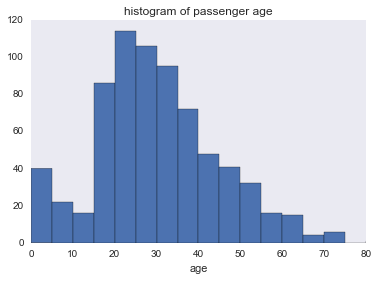

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [85]:
'''Plotting the age of all the passengers in a histogram, with each bar being a span of 5 years'''


def age(column_data):
    plt.xlim(0,np.amax(column_data))
    plt.hist(column_data, bins = range(0, len(column_data),5))
    plt.xlabel('age')
    plt.title('histogram of passenger age')
    plt.grid()
    return plt.show()


np.amin(titanic_df['Age'])

age(titanic_df['Age'])
titanic_df['Age'].describe()

'''resources: http://pandas.pydata.org/pandas-docs/stable/visualization.html'''

In [86]:
'''Checking to see outliers of the 'Fare' column. There seems to be 15 people that didnt pay anything for their ticket. 

The interesting thing to note is that all of the people who paid 0$ for their ticket are male, and have embarked from Southampton.
There must have been prize drawings, a lottery system, bartering of tickets or something of the like for leftover tickets, being
that Southampton was the last embarkment location

Since the data for Pclass, 0$, and age(having 8 NaN values) fare is sporatic, when comparing the stats I will remove these 15 rows'''

zero_fare = titanic_df.loc[titanic_df['Fare'] == 0]
print len(zero_fare)
print zero_fare


'''When comparint age to another element, I will take out the NaN age columns'''

drop_nan_age_values = titanic_df[~titanic_df['Age'].isnull()] 

'''Here I'm dropping all the values where Fare == 0, so I can compare it with Age and PClass'''

drop_bad_values = drop_nan_age_values.loc[~(drop_nan_age_values['Fare'] == 0)]

15
     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0       2              Knight, Mr. R

891

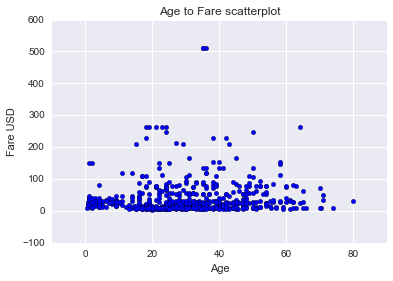

In [87]:
'''Scatter plot of x axis Age, and y axis Fare'''


plt.scatter(drop_bad_values['Age'],drop_bad_values['Fare'])
plt.xlabel("Age")
plt.ylabel("Fare USD")
plt.title("Age to Fare scatterplot")


titanic_df['Fare'].count()



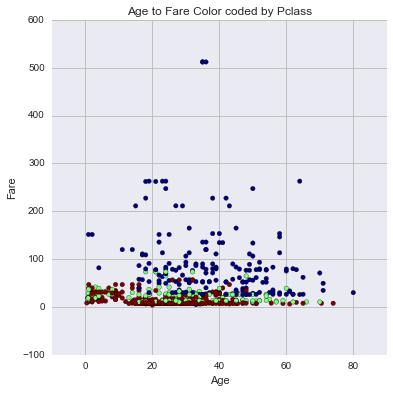

'matplotlib cm documentation: http://matplotlib.org/api/cm_api.html\n    -will need to look indepth to understand fully how to use\n    \n    '

In [112]:
'''color coded for Pclasses

Blue = first class
Green = second class
red = third class'''

from matplotlib import cm


fig = plt.figure(figsize=(6,6))
age_fare_class = fig.add_subplot(111)
age_fare_class.set_title('Age to Fare Color coded by Pclass')
age_fare_class.set_xlabel('Age')
age_fare_class.set_ylabel('Fare')
age_fare_class.grid(True,linestyle = '-', color='.75')
x = drop_bad_values['Age']
y = drop_bad_values['Fare']
z = drop_bad_values['Pclass']

plt.scatter(x,y, s=20, c=z, cmap = cm.jet);

plt.show()


'''matplotlib cm documentation: http://matplotlib.org/api/cm_api.html
    -will need to look indepth to understand fully how to use
    
    '''

In [89]:
'''since the graph makes it look like 2nd class and 3rd class fare cost aren't too far apart, I'm checking for correlation'''

drop_first_class_entries = drop_nan_age_values.loc[~(drop_nan_age_values['Pclass'] == 1)]



In [90]:
'''Finding pearson's R of data'''
def correlation(x,y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    pearson = (std_x * std_y).mean()
    return pearson

def does_it_correlate(data):
    
    if abs(data) <=.20:
        print "There isn't a likely correlation"
        print ""
    elif abs(data) >=.21 and data <=.50:
        print "There probably is correlation"
        print ""
    else:
        print "There is a high probability of correlation"
        print ""

'''abs = absolute value'''

In [91]:
'''seems there is enough of a correlation so I wont look into it further'''

print "Pearson's R value of 2nd and 3rd class to fare:"
print correlation(drop_first_class_entries['Pclass'], drop_first_class_entries['Fare'])
does_it_correlate(correlation(drop_first_class_entries['Pclass'], drop_first_class_entries['Fare']))

Pearson's R value of 2nd and 3rd class to fare:
-0.327835645997
There probably is correlation



In [92]:
'''I originally thought that the high price ticket might be a mistake, but finding them all in first class and all them had survived 
made me think they could have been VIP'''

titanic_df.loc[titanic_df['Fare'] >= 450]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C


In [93]:
'''Because there are three people that paid a high ticket that screws up the standard deviation,
I'm going to remove the those tickets'''
drop_fare_zero = titanic_df.loc[~(titanic_df['Fare'] == 0)]

remove_fare_outliers = drop_fare_zero.loc[~(drop_fare_zero['Fare'] > 500)]
len(remove_fare_outliers)

remove_fare_outliers['Fare'].describe()

count    873.000000
mean      31.107631
std       41.331513
min        4.012500
25%        7.925000
50%       14.500000
75%       31.275000
max      263.000000
Name: Fare, dtype: float64

In [94]:
'''Do fare and survival correlate?'''

print "Pearson's R value:"
print correlation(remove_fare_outliers['Fare'], remove_fare_outliers['Survived'])

does_it_correlate(correlation(remove_fare_outliers['Fare'], remove_fare_outliers['Survived']))

Pearson's R value:
0.256171957345
There probably is correlation



In [95]:
'''After taking out the Age NaN categories, I wanted to find out if the Age of passengers had much to do with the
survival. My findings didn't have a strong correlation, so I didn't persue further possibilities'''

sum_of_survived_by_age = float(drop_bad_values['Survived'].sum())
sum_of_age_data = float(len(drop_bad_values['Age']))

def find_percent_of_survival(data1, data2):
    return data1 / data2


print "The % of people that survived in correlation to age of passengers: "
print find_percent_of_survival(sum_of_survived_by_age, sum_of_age_data)
print ""
#correlation between Age and survived
print "Pearson's R value:"
print correlation(drop_bad_values['Age'], drop_bad_values['Survived'])

does_it_correlate(correlation(drop_bad_values['Age'], drop_bad_values['Survived']))

The % of people that survived in correlation to age of passengers: 
0.408769448373

Pearson's R value:
-0.0737253035565
There isn't a likely correlation



In [96]:


check_child_survival_correlation = drop_bad_values.loc[~(drop_bad_values['Age'] > 18)]
print "Pearsons's R value for Age to survival"
print correlation(check_child_survival_correlation['Age'],check_child_survival_correlation['Survived'])
does_it_correlate(correlation(check_child_survival_correlation['Age'],check_child_survival_correlation['Survived']))
print ""

sum_survived_child = float(check_child_survival_correlation['Survived'].sum())
len_age_child = float(len(check_child_survival_correlation['Age']))

sum_all_passengers_survived = float(titanic_df['Survived'].sum())
len_all_passengers = float(len(titanic_df))

print "percent of passengers under 18 to survived"
print find_percent_of_survival(sum_survived_child,len_age_child)
# drop_nan_age_values.loc[~(drop_nan_age_values['Fare'] == 0)]

print ""
print "percent of all passengers that survived"
print find_percent_of_survival(sum_all_passengers_survived,len_all_passengers)


Pearsons's R value for Age to survival
-0.239028350304
There probably is correlation


percent of passengers under 18 to survived
0.503597122302

percent of all passengers that survived
0.383838383838


Pearsons R value for class to survived:
-0.338481035961
There probably is correlation



'Graph #2 shows that there was a much higher probability for survival the higher class the individual was'

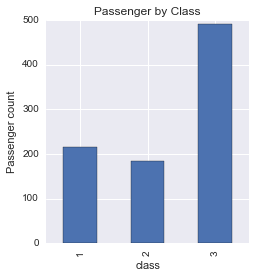

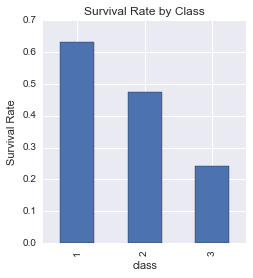

In [97]:
'''To find correlation between the class of the individual and the survival rate of the individual, I created a function
passenger class, which I will use to create graphs to compare with Pclass'''

def passenger_class(column_data, xlabel = 'class', ylabel = 'Passenger count', title = 'Passenger by Class', kind = 'bar',
                   stacked = False, color = [], subplot_type = 121):
    fig_size = plt.figure(figsize=(8,4))
    fig_size.add_subplot(subplot_type)
    column_data.plot(kind)
    plt.xlabel(xlabel)
    plt.title(title)
    plt.ylabel(ylabel)
    return plt

passenger_to_class = titanic_df.groupby('Pclass').Survived.count()
class_to_survive_rate = titanic_df.groupby('Pclass').Survived.sum()/titanic_df.groupby('Pclass').Survived.count()

#wondering why this doesn't appear side to side
passenger_class(passenger_to_class)
passenger_class(class_to_survive_rate, ylabel = 'Survival Rate', title = 'Survival Rate by Class', subplot_type = 122)

print "Pearsons R value for class to survived:"
print correlation(titanic_df['Survived'], titanic_df['Pclass'])
does_it_correlate(correlation(titanic_df['Pclass'], titanic_df['Survived']))

'''Graph #2 shows that there was a much higher probability for survival the higher class the individual was'''

'''Subplot type: http://stackoverflow.com/questions/24337813/how-does-subplot-work-and-what-is-the-difference-between-subplot121-and-subplo'''

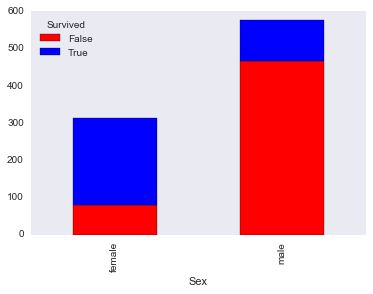

In [98]:
'''reguardless of class, I wanted to see if the survival rate for female and male had a difference. It seems that females survived
at a much higher rate than males.'''

sex_to_survived = pd.crosstab(titanic_df.Sex, titanic_df.Survived.astype(bool))
sex_to_survived.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)


'''stacked bar chart: http://matplotlib.org/examples/pylab_examples/bar_stacked.html'''

In [110]:

mymap = {'male':1,'female':2}
sex_to_int = titanic_df.applymap(lambda s: mymap.get(s) if s in mymap else s)


print "Pearsons R value for Sex to survived:"
print correlation(sex_to_int['Survived'], sex_to_int['Sex'])
does_it_correlate(correlation(sex_to_int['Survived'], sex_to_int['Sex']))


'''resourse: http://www.secnetix.de/olli/Python/lambda_functions.hawk '''

Pearsons R value for Sex to survived:
0.543351380658
There is a high probability of correlation



'resourse: http://www.secnetix.de/olli/Python/lambda_functions.hawk '